# Final Project Submission
* Student names:

**Frank Kiptoo Ruto**

**Lilian Ngige**

**Abdihakim Mohamed**

* Student pace: **Part Time**

# Forecasting Real Estate Prices for Strategic Investment

## Project Overview

### Objective

To develop a time series forecasting model using Zillow data to assist real estate investors in making informed decisions about where to invest their capital. This model will provide predictions and insights into property price trends over time, helping investors identify regions and cities with potential for price appreciation.

### Business Context

Our client, a real-estate investment firm, aims to expand its portfolio with strategic investments in residential properties. The real estate market, being influenced by a myriad of factors, presents both opportunities and risks. The firm's success hinges on its ability to forecast future market trends and make data-driven decisions.

### Business Challenge

The real estate investment firm seeks to maximize its return on investment by strategically purchasing properties in areas predicted to experience significant value appreciation. The challenge lies in analyzing vast amounts of data to discern these profitable areas.

The firm needs insights into where the market is heading, not just where it has been.

## Data Understanding

### Dataset

This project will explore the Housing Prices in the United States, from the years 1996 - 2018 using the Zillow dataset.

Each row represents a unique zip code. Each record contains location info and median housing sales prices for each month.

### Key Features of the Dataset

There are 14,723 rows and 272 columns:

* RegionID, numerical. This is a unique Id for the regions.

* RegionName, numerical. This field contains the zip code of the region.

* City, string. This column provides the specific city name of the housing data.

* State, string. This column provides the specific state name.

* Metro, string. This provides the name of the metro city that surrounds that region.

* CountyName, string. This is the county name for that region.

* SizeRank, string. This is the ranking done based on the urbanization of the area.

* Dates, The next several columns provide the month and the year with the median price of a real estate.

# Data Understanding

This helps in understanding the data before further analysis and modelling. We used Zillow's monthly median home price data by zipcode for the period 1996 to 2018.

### Data Preparation

#### Importation of Libraries and Loading of Data

In [1]:
# Analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import time

# Warning libraries
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

# Metric libraries
from sklearn.metrics import mean_squared_error

# Modeling libraries
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from sklearn.linear_model import LassoLarsCV

### Loading data into a dataframe

In [2]:
# Reading csv file and loading into a df
df = pd.read_csv('data/zillow_data.csv')

In [3]:
# Previewing the first 10 records
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [4]:
# check the column names
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [5]:
# Preview the overview of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


The data is in wide format. In order to properly analyze and model, the data needs to be "melted" into long format. Then, I will narrow down the 14,723 zip codes into the top 5 zip codes according to return on investment.

## Data Preprocessing

In [6]:
# check no. of rows and columns
df.shape

(14723, 272)

There are 14,723 rows and 272 columns contained in this dataset.

### Rename RegionName to ZipCode

As per the column descriptions, RegionName actually means ZipCode. For undertanding purposes this shall be renamed to ZipCode to avoid any confusion.

In [7]:
df.rename(columns={'RegionName':'ZipCode'}, inplace=True)
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


### Drop RegionID from dataframe

RegionID per the descriptions is a unique Identfier for each region and has no significance to the project.
Date will eventually become our new index.

In [8]:
df.drop(columns=['RegionID'], inplace=True)
df.head()

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


## Zipcode Selection

In order to determine the best States to focus on for the real estate investment, we consider the following:

Calculating the Return on Investment(ROI) in percentage.

* ROI = (Final Value/Intial Value) - 1 * 100

In [9]:
# Calculate ROI for each zip code
df['ROI'] = ((df['2018-04'] / df['1996-04']) - 1) * 100 
df.head(10)

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
0,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,208.378217
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,36.529487
2,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,56.796578
3,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,162.397109
4,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,57.179819
5,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,95700.0,...,158700,160200,161900,162800,162800,162800,162900,163500,164300,72.947368
6,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,152400.0,...,400000,407300,411600,413200,414300,413900,411400,413200,417900,173.315893
7,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,217000.0,...,787100,776100,774900,777900,777900,778500,780500,782800,782800,261.570439
8,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,96100.0,...,167400,168400,169600,170900,172300,173300,174200,175400,176200,84.696017
9,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,781900.0,...,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500,397.845953


In [10]:
# Sort the DataFrame based on ROI in descending order
df_sorted_by_roi = df.sort_values(by='ROI', ascending=False)

# Select the top 5 zip codes with the highest ROI
top_5_zip_codes = df_sorted_by_roi.head(5)

# Display the top 5 zip codes
top_5_zip_codes

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
117,11211,New York,NY,New York,Kings,118,133200.0,132900.0,132500.0,132200.0,...,1406400,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,1118.993994
1155,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,146600.0,...,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,1053.552279
475,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,147700.0,...,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,994.250513
191,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,139100.0,...,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300,940.306122
106,11215,New York,NY,New York,Kings,107,225700.0,227500.0,229400.0,231600.0,...,2201100,2244400,2266100,2275800,2287100,2288900,2265300,2244900,2243900,894.195835


### Check for missing data

In [11]:
# check for missing values
df.isna().sum()

ZipCode          0
City             0
State            0
Metro         1043
CountyName       0
              ... 
2018-01          0
2018-02          0
2018-03          0
2018-04          0
ROI           1039
Length: 272, dtype: int64

## Reshape from Wide to Long Format

In [12]:
# Function to transform a DataFrame from a wide format to a long format
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['ZipCode', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI'], 
                     var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [13]:
# Melted dataframe
melt_df = melt_data(df)
melt_df

,ZipCode,SizeRank,City,State,Metro,CountyName,ROI,Date,value
0,60657,1,Chicago,IL,Chicago,Cook,208.378217,1996-04-01,334200.0
1,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,36.529487,1996-04-01,235700.0
2,77494,3,Katy,TX,Houston,Harris,56.796578,1996-04-01,210400.0
3,60614,4,Chicago,IL,Chicago,Cook,162.397109,1996-04-01,498100.0
4,79936,5,El Paso,TX,El Paso,El Paso,57.179819,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,1338,14719,Ashfield,MA,Greenfield Town,Franklin,121.247357,2018-04-01,209300.0
3901591,3293,14720,Woodstock,NH,Claremont,Grafton,143.581446,2018-04-01,225800.0
3901592,40404,14721,Berea,KY,Richmond,Madison,133.625219,2018-04-01,133400.0
3901593,81225,14722,Mount Crested Butte,CO,NaN,Gunnison,247.671376,2018-04-01,664400.0


In [14]:
# Converting the date data type into date time and indexing
melt_df['Date'] = pd.to_datetime(melt_df['Date'], format='%m/%y')

# Set the 'Date' column as index
melt_df.set_index('Date', inplace=True)
melt_df

,ZipCode,SizeRank,City,State,Metro,CountyName,ROI,value
Date,,,,,,,,
1996-04-01,60657,1,Chicago,IL,Chicago,Cook,208.378217,334200.0
1996-04-01,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,36.529487,235700.0
1996-04-01,77494,3,Katy,TX,Houston,Harris,56.796578,210400.0
1996-04-01,60614,4,Chicago,IL,Chicago,Cook,162.397109,498100.0
1996-04-01,79936,5,El Paso,TX,El Paso,El Paso,57.179819,77300.0
...,...,...,...,...,...,...,...,...
2018-04-01,1338,14719,Ashfield,MA,Greenfield Town,Franklin,121.247357,209300.0
2018-04-01,3293,14720,Woodstock,NH,Claremont,Grafton,143.581446,225800.0
2018-04-01,40404,14721,Berea,KY,Richmond,Madison,133.625219,133400.0


In [15]:
# Renaming the column value to MedianValue
melt_df.rename(columns = {'value' : 'MedianValue'}, inplace=True)
melt_df

,ZipCode,SizeRank,City,State,Metro,CountyName,ROI,MedianValue
Date,,,,,,,,
1996-04-01,60657,1,Chicago,IL,Chicago,Cook,208.378217,334200.0
1996-04-01,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,36.529487,235700.0
1996-04-01,77494,3,Katy,TX,Houston,Harris,56.796578,210400.0
1996-04-01,60614,4,Chicago,IL,Chicago,Cook,162.397109,498100.0
1996-04-01,79936,5,El Paso,TX,El Paso,El Paso,57.179819,77300.0
...,...,...,...,...,...,...,...,...
2018-04-01,1338,14719,Ashfield,MA,Greenfield Town,Franklin,121.247357,209300.0
2018-04-01,3293,14720,Woodstock,NH,Claremont,Grafton,143.581446,225800.0
2018-04-01,40404,14721,Berea,KY,Richmond,Madison,133.625219,133400.0


## Check info details of the new dataframe

In [16]:
# Check info of melted df
melt_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744704 entries, 1996-04-01 to 2018-04-01
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ZipCode      int64  
 1   SizeRank     int64  
 2   City         object 
 3   State        object 
 4   Metro        object 
 5   CountyName   object 
 6   ROI          float64
 7   MedianValue  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 257.1+ MB


In [17]:
# Check for null values
melt_df.isna().sum()

ZipCode             0
SizeRank            0
City                0
State               0
Metro          236023
CountyName          0
ROI            118444
MedianValue         0
dtype: int64

Given the description of Metro as the name of the metro city that surrounds that region and it contains null values and since we cannot fill the name of the city with any random name or unknown name in the dataframe, it is safe to drop the null values as well as the ROI. It would not make sense to backfill or forward fill the null values for ROI since this could mean that they had zero value for the median values for the specific dates, the safest way to go about it is to drop the null values

#### Drop Null values

In [18]:
# Drop null values
melt_df_cleaned = melt_df.dropna()
melt_df_cleaned

,ZipCode,SizeRank,City,State,Metro,CountyName,ROI,MedianValue
Date,,,,,,,,
1996-04-01,60657,1,Chicago,IL,Chicago,Cook,208.378217,334200.0
1996-04-01,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,36.529487,235700.0
1996-04-01,77494,3,Katy,TX,Houston,Harris,56.796578,210400.0
1996-04-01,60614,4,Chicago,IL,Chicago,Cook,162.397109,498100.0
1996-04-01,79936,5,El Paso,TX,El Paso,El Paso,57.179819,77300.0
...,...,...,...,...,...,...,...,...
2018-04-01,97028,14717,Rhododendron,OR,Portland,Clackamas,156.461087,349300.0
2018-04-01,1338,14719,Ashfield,MA,Greenfield Town,Franklin,121.247357,209300.0
2018-04-01,3293,14720,Woodstock,NH,Claremont,Grafton,143.581446,225800.0


In [19]:
# Check info of melted df
melt_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3417175 entries, 1996-04-01 to 2018-04-01
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ZipCode      int64  
 1   SizeRank     int64  
 2   City         object 
 3   State        object 
 4   Metro        object 
 5   CountyName   object 
 6   ROI          float64
 7   MedianValue  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 234.6+ MB


## EDA & Data Visualization

The 2008 housing bubble crisis in the United States, a significant financial event, was precipitated by a drastic decline in the housing market. This crisis originated in the early 2000s during a housing boom, fueled by low interest rates and an influx of subprime mortgages to borrowers with poor credit histories. 

Financial institutions bundled these risky mortgages into complex financial instruments like mortgage-backed securities (MBS) and collateralized debt obligations (CDOs), which were sold globally. As interest rates rose and housing prices fell, subprime borrowers defaulted en masse, leading to a surge in foreclosures and a plummet in housing prices. 

This devaluation had a catastrophic effect on the securities tied to real estate, resulting in significant losses for banks and financial firms, some of which, like Lehman Brothers, collapsed, while others required government bailouts. 

The crisis led to a severe credit crunch, sparking a global economic recession with high unemployment and stalled economic growth. In response, governments worldwide implemented large fiscal stimulus packages, and in the U.S., the Dodd-Frank Wall Street Reform and Consumer Protection Act was enacted to reduce financial system risks. 

The aftermath of the crisis saw a slow recovery and significant changes in financial regulations and the housing market.

For this we are going to filter the dataframe to only contain records from 2008-01 till 2018-04 to account for the housing bubble crisis given the huge dataframe that we have of about 3,744,704 records of data.

In [20]:
# Description of the df
melt_df_cleaned.describe()

,ZipCode,SizeRank,ROI,MedianValue
count,3.417175e+06,3.417175e+06,3.417175e+06,3.417175e+06
mean,4.762490e+04,6.938467e+03,1.337142e+02,2.138030e+05
std,2.997400e+04,4.205019e+03,8.746052e+01,2.160799e+05
min,1.001000e+03,1.000000e+00,-5.326087e+01,1.140000e+04
25%,2.074300e+04,3.295000e+03,7.912281e+01,1.028000e+05
50%,4.521100e+04,6.704000e+03,1.145390e+02,1.528000e+05
75%,7.567200e+04,1.048700e+04,1.629456e+02,2.469000e+05
max,9.990100e+04,1.472300e+04,1.118994e+03,8.558700e+06


#### Filter dataframe to only contain records from 2008-01 till 2018-04 to account for the housing bubble crisis

In [21]:
# Filter df
post_bubble = melt_df_cleaned.loc['2008-01-01':'2018-04-01']
post_bubble

,ZipCode,SizeRank,City,State,Metro,CountyName,ROI,MedianValue
Date,,,,,,,,
2008-01-01,60657,1,Chicago,IL,Chicago,Cook,208.378217,881700.0
2008-01-01,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,36.529487,213900.0
2008-01-01,77494,3,Katy,TX,Houston,Harris,56.796578,254100.0
2008-01-01,60614,4,Chicago,IL,Chicago,Cook,162.397109,1163000.0
2008-01-01,79936,5,El Paso,TX,El Paso,El Paso,57.179819,131200.0
...,...,...,...,...,...,...,...,...
2018-04-01,97028,14717,Rhododendron,OR,Portland,Clackamas,156.461087,349300.0
2018-04-01,1338,14719,Ashfield,MA,Greenfield Town,Franklin,121.247357,209300.0
2018-04-01,3293,14720,Woodstock,NH,Claremont,Grafton,143.581446,225800.0


#### Resample date index to 'MS'

In [22]:
# Group the time series into monthly buckets
post_bubble_monthly = post_bubble['MedianValue'].resample('MS')

# Take the mean of each group 
post_bubble_monthly_mean = post_bubble_monthly.mean()

# Display the first 10 elements of resulting time series
post_bubble_monthly_mean.head(10)

Date
2008-01-01    261930.050407
2008-02-01    259910.337340
2008-03-01    257791.903839
2008-04-01    255611.508337
2008-05-01    253319.364095
2008-06-01    250900.953858
2008-07-01    248588.708802
2008-08-01    246422.690965
2008-09-01    244451.128344
2008-10-01    242598.511051
Freq: MS, Name: MedianValue, dtype: float64

In [23]:
# Check if null values still exist
post_bubble.isna().sum()

ZipCode        0
SizeRank       0
City           0
State          0
Metro          0
CountyName     0
ROI            0
MedianValue    0
dtype: int64

## Visualization

### Cities with the Highest Median House Price

In [24]:
# Visualizing top five cities with highest house prices
top_5_cities = pd.DataFrame(post_bubble.groupby('City')['MedianValue'].mean()
                                    .sort_values(ascending=False).head(5))
top_5_cities

,MedianValue
City,
Atherton,4.231420e+06
Palm Beach,3.238890e+06
Snowmass Village,2.614449e+06
Newport Coast,2.559645e+06
Portola Valley,2.558819e+06


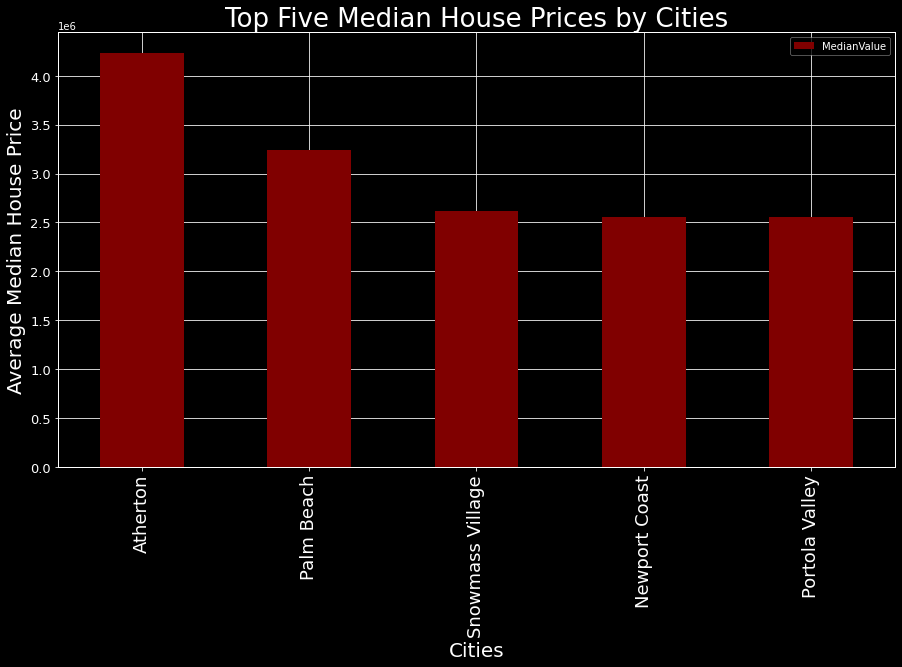

In [72]:
# Plotting the top 5 cities in a bar chart
ax1 = top_5_cities.plot(kind='bar', figsize=(15,8), color="maroon", fontsize=13);

# Setting the opacity of the bar chart
ax1.set_alpha(0.8)

plt.style.use("dark_background")

# Setting the title of the plot with a font size of 26
ax1.set_title("Top Five Median House Prices by Cities", fontsize=26)

# Setting the label for the y-axis with a font size of 20
ax1.set_ylabel("Average Median House Price", fontsize=20);

# Setting the label for the x-axis with a font size of 20
ax1.set_xlabel("Cities", fontsize=20)

# Customizing the font size of the x-axis tick labels to 18
plt.xticks(fontsize= 18)

# Displaying the plot
plt.show()

### Zipcodes with Highest ROI

In [26]:
# Visualizing top five zipcodes with highest price volatility
top_5_zip_codes = pd.DataFrame(post_bubble.groupby('ZipCode')['ROI'].mean().sort_values(ascending=False).head(5))
top_5_zip_codes

,ROI
ZipCode,
11211,1118.993994
11222,1053.552279
11216,994.250513
7302,940.306122
11215,894.195835


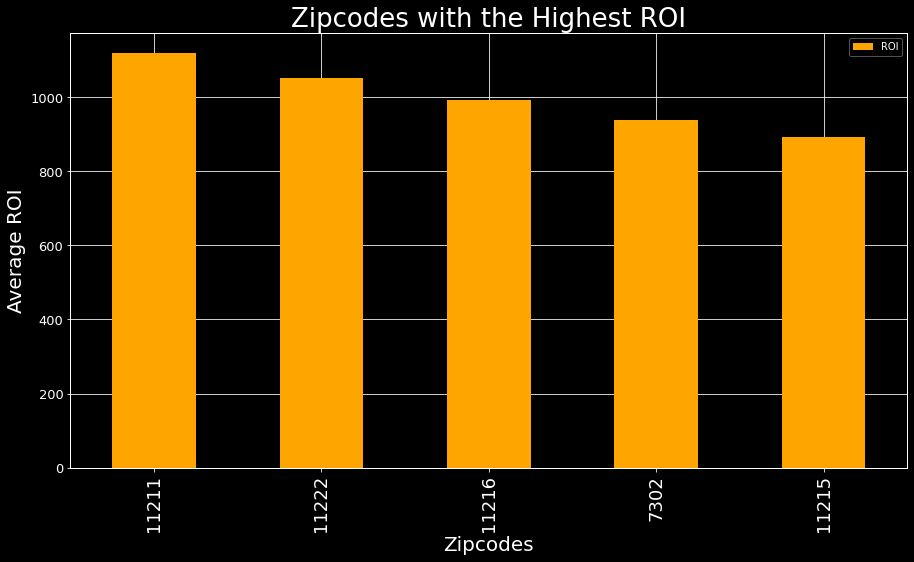

In [27]:
# Creating a bar chart for the top 5 zip codes with the highest ROI
ax2 = top_5_zip_codes.plot(kind='bar', figsize=(15,8), color="orange", fontsize=13);

# Setting the transparency of the bars in the chart to 0.8
ax2.set_alpha(0.8)

# Adding a title to the chart "Zipcodes with the Highest ROI" with a font size of 26
ax2.set_title("Zipcodes with the Highest ROI", fontsize=26)

# Setting the label for the y-axis to "Average ROI" with a font size of 20
ax2.set_ylabel("Average ROI", fontsize=20);

# Setting the label for the x-axis to "Zipcodes" with a font size of 20
ax2.set_xlabel("Zipcodes", fontsize=20)

# Customizing the font size of the tick labels on the x-axis to 18 for better readability
plt.xticks(fontsize= 18)

# Displaying the plot
plt.show()


In [28]:
# Group the melted and cleaned DataFrame by 'Date', then calculate the mean of 'MedianValue' for each group.
melt = melt_df_cleaned.groupby('Date').aggregate({'MedianValue':'mean'})
melt

,MedianValue
Date,
1996-04-01,121203.582784
1996-05-01,121327.056999
1996-06-01,121449.019000
1996-07-01,121568.359829
1996-08-01,121699.387359
...,...
2017-12-01,295114.261342
2018-01-01,296821.830167
2018-02-01,298687.964327


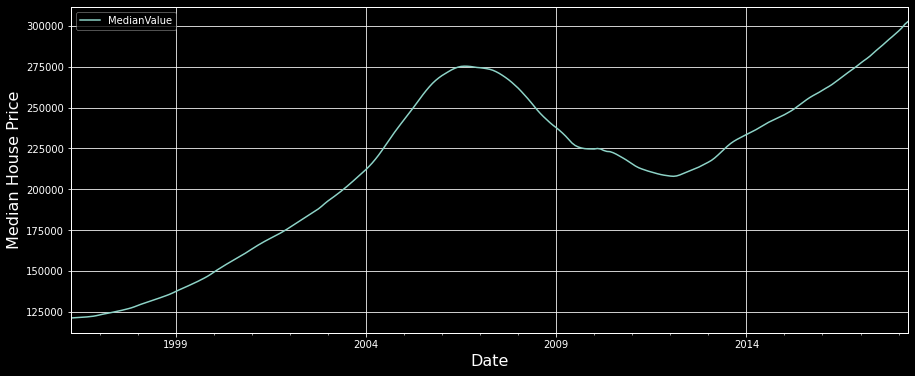

In [29]:
# Visualize the time series
ax = melt.plot(figsize=(15, 6))
ax.set_ylabel("Median House Price", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
plt.show()

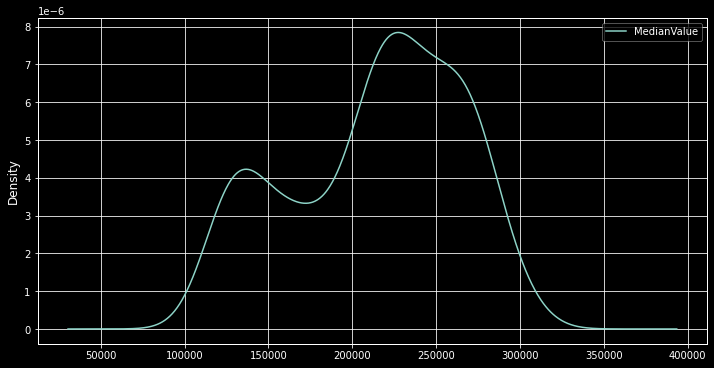

In [30]:
# Plot a density plot for melt df
melt.plot(kind='kde', figsize = (12,6))
plt.show()

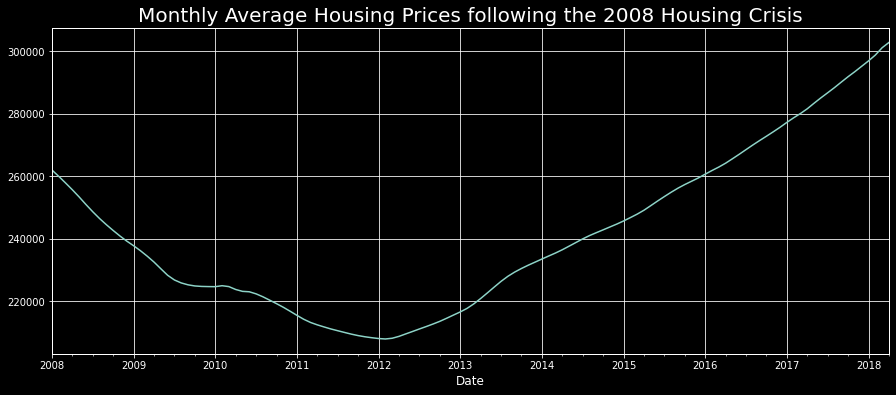

In [31]:
# Plot the time series
post_bubble_monthly_mean.plot(figsize=(15,6))
plt.title('Monthly Average Housing Prices following the 2008 Housing Crisis', fontsize = 20)
plt.show();

The time series plot depicts monthly average housing prices over a period spanning from 2008 to 2018. Here's an analysis of the plot:

**Initial Decline:**  Starting in 2008, there's a clear downward trend in housing prices, reflecting the immediate impact of the 2008 housing crisis. Prices appear to decline rapidly at first, indicating a market reaction to the financial turmoil and recession that hit the real estate market during that time.

**Bottoming Out:** Around late 2011, the trend in housing prices bottoms out. This period likely represents the market reaching its lowest point post-crisis, after which the trend reverses. It suggests that the factors causing the decline, such as foreclosures and financial instability, may have started to stabilize or diminish.

**Recovery and Growth:** From 2012 onwards, there is a noticeable upward trend in housing prices. This steady increase suggests a recovery phase where confidence returns to the market, likely fueled by economic recovery, improved lending standards, and possibly government intervention to stabilize the housing market.

**Acceleration in Growth:** Around 2016, the growth in housing prices accelerates, as indicated by the steeper slope of the line. This could be due to a combination of factors, including lower interest rates, increased demand for housing, and a stronger overall economy.

**Current Prices Exceeding Pre-Crisis Levels:** By the end of the plotted period (2018), housing prices not only recover from their post-crisis lows but also exceed the levels seen at the beginning of 2008. This suggests a strong housing market that has potentially entered a phase of expansion beyond recovery.

# Time Series Modeling

### Removing Trends

In [32]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

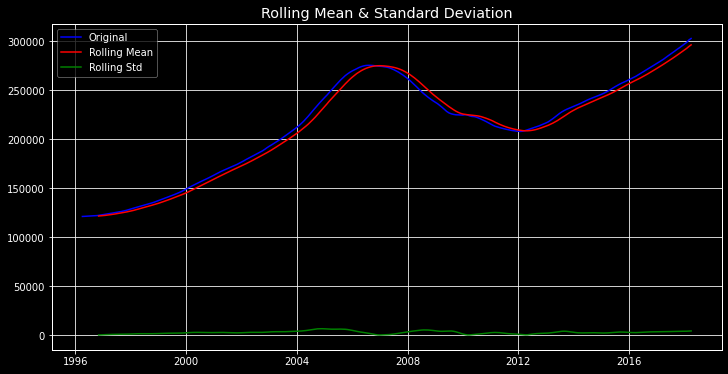

Results of Dickey-Fuller Test: 

Test Statistic                  -1.580701
p-value                          0.493280
#Lags Used                      11.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


In [33]:
stationarity_check(melt)

### Observation

**Analysis of the Time Series Plot:**

* The blue line represents the original time series data over time from 1996 to approximately 2018.

* The red line represents the rolling mean of the time series. It smooths out short-term fluctuations and highlights the longer-term trend in the data. The rolling mean seems to follow the original time series closely, suggesting a persistent long-term trend in the data.

* The black line represents the rolling standard deviation, which measures the variability of the data. It is relatively flat and low, suggesting that the variability in the data is consistent over time, despite the upward trend.

**Analysis of Dickey-Fuller Test Results:**

* Test Statistic (-1.580701): This value is higher than any of the critical values. In an ADF test, we look for the test statistic to be lower (more negative) than the critical values to reject the null hypothesis of a unit root.

* p-value (0.493280): A p-value above 0.05 suggests that we fail to reject the null hypothesis at a 5% significance level. This implies that the time series is non-stationary with a 95% confidence level.

* #Lags Used (11.000000): This indicates the number of lagged versions of the time series that the test used to check for stationarity.

* Number of Observations Used (253.000000): After accounting for the lags, this many observations were used in the test.

* Critical Value (1%), Critical Value (5%), and Critical Value (10%): These are the critical values for the test statistic at the 1%, 5%, and 10% significance levels, respectively. For the test statistic to indicate stationarity, it would need to be below the critical value at one of these levels.

## Differencing

In [34]:
# Difference data
melt_diff = melt.diff(periods=12)

# Drop the missing values
melt_diff.dropna(inplace=True)

# Check out the first few rows
melt_diff.head(15)

,MedianValue
Date,
1997-04-01,3046.932920
1997-05-01,3318.914308
1997-06-01,3602.202404
1997-07-01,3897.262505
1997-08-01,4198.480031
1997-09-01,4503.350136
1997-10-01,4811.120589
1997-11-01,5122.217914
1997-12-01,5436.696394


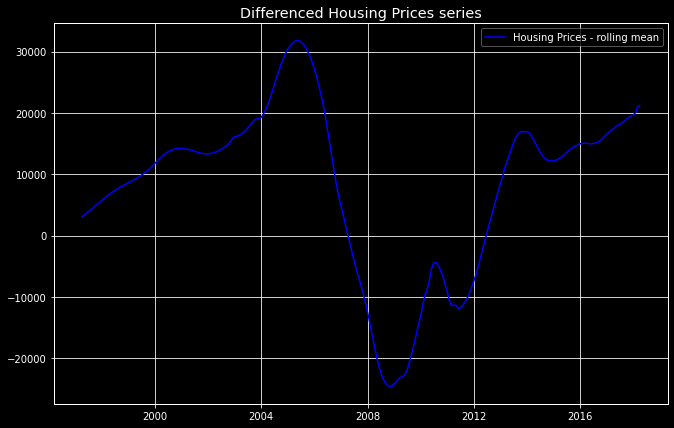

In [35]:
fig = plt.figure(figsize=(11,7))
plt.plot(melt_diff, color='blue',label='Housing Prices - rolling mean')
plt.legend(loc='best')
plt.title('Differenced Housing Prices series')
plt.show(block=False)

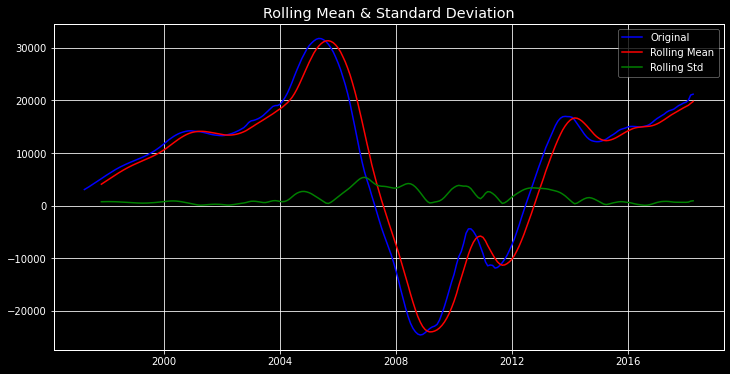

Results of Dickey-Fuller Test: 

Test Statistic                  -2.146416
p-value                          0.226264
#Lags Used                      16.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [36]:
# Perform the stationarity check
stationarity_check(melt_diff)

## Decomposition

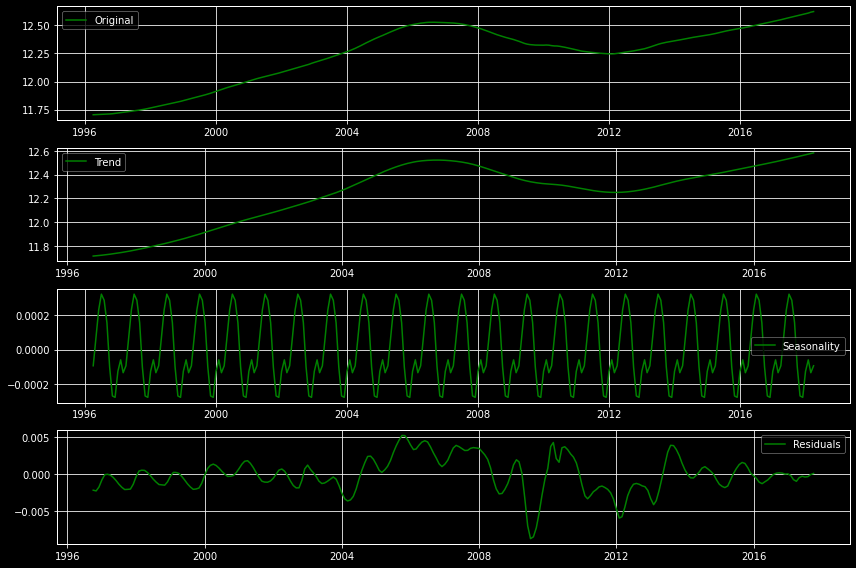

In [37]:
# Apply seasonal_decompose()
decomposition = sd(np.log(melt))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(melt), label='Original', color='green')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='green')
plt.legend(loc='best')
plt.tight_layout()

### Observation

The top plot shows the original data, which appears to have an upward trend over the years.

The second plot shows the extracted trend component, confirming the long-term increase in values.

The third plot shows the seasonality component, indicating regular and repeating patterns within the data, which could be annual cycles.

The bottom plot shows the residuals, which represent what remains after the trend and seasonal components have been removed. The residuals seem fairly random with no discernible pattern, which is ideal in time series decomposition.

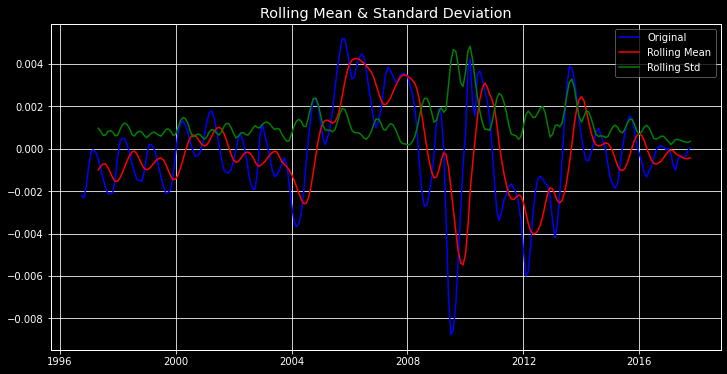

Results of Dickey-Fuller Test: 

Test Statistic                  -3.409144
p-value                          0.010651
#Lags Used                       8.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


In [38]:
# Drop missing values from residuals 
melt_log_decompose = residual
melt_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(melt_log_decompose)

In [39]:
diff_df = pd.DataFrame(melt_log_decompose)

# # Optionally, if you want to rename the column
diff_df.columns = ['Residuals']

# Now df is a DataFrame with the date as the index and the decomposed values in the 'Residuals' column
diff_df

,Residuals
Date,
1996-10-01,-0.002221
1996-11-01,-0.002317
1996-12-01,-0.001797
1997-01-01,-0.000836
1997-02-01,-0.000118
...,...
2017-06-01,-0.000327
2017-07-01,-0.000432
2017-08-01,-0.000386


### Observation

The original data (in blue) exhibits fluctuations around a mean level, which seems to be close to zero.

The rolling mean (in red) is smooth, indicating the underlying trend in the data without short-term fluctuations.

The rolling standard deviation (in black) is relatively stable over time, suggesting consistent variability in the data.

**Interpretation of Dickey-Fuller Test Results:**

* Test Statistic (-3.409144): The test statistic is smaller (more negative) than the critical value at the 5% level, suggesting that we can reject the null hypothesis of a unit root at this level.

* p-value (0.010651): The p-value is less than 0.05, providing further evidence to reject the null hypothesis, meaning the time series is likely stationary.

* #Lags Used (8.000000): The test used 8 lags in its calculations, which could influence the test's sensitivity to detect stationarity.

* Number of Observations Used (244.000000): The test used 244 observations, which is the sample size after accounting for the lags.

* Critical Values: These values are the thresholds for the test statistic at the 1%, 5%, and 10% significance levels. Since the test statistic is below the critical value at 5%, we can say with 95% confidence that the data is stationary.

## Correlation and Autocorrelation

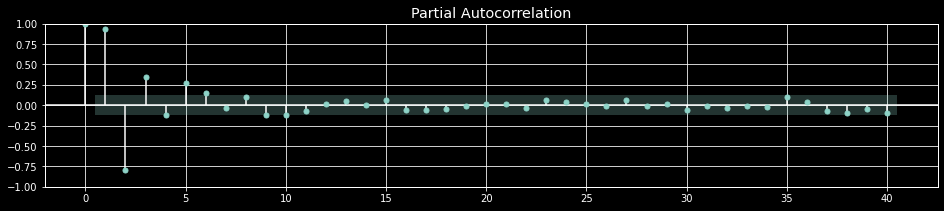

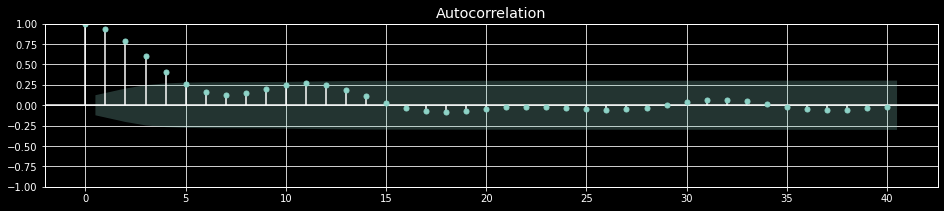

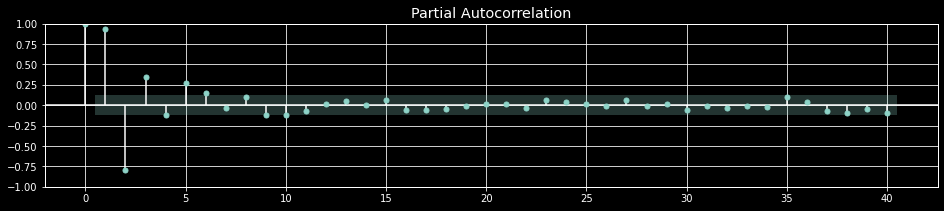

In [40]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(diff_df, ax=ax, lags=40)

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(diff_df, ax=ax, lags=40, method="ywm")

### Observation

**Top Plot - Partial Autocorrelation (PACF):**

The PACF plot shows the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags.
The significant spikes at lags 1 and 2 suggest that there is a strong partial autocorrelation at these lags. This could imply an AR process of order 2, where the current value of the series is influenced by its two immediate previous values.

**Middle Plot - Autocorrelation (ACF):**

The ACF plot shows the correlation of the time series with its own lagged values.
The ACF shows a gradual decline in the correlation values as the lags increase, which is typical for an AR process. The fact that it doesn't cut off abruptly suggests that the time series could be an AR process rather than an MA process.

**Bottom Plot - Partial Autocorrelation (PACF):**

This plot is labeled as PACF, but it typically would not be shown twice unless it is a PACF plot for a differenced version of the time series or another variable.
If this is a PACF plot for a differenced series, the absence of significant spikes could indicate that differencing the data has removed autoregressive characteristics, and the process might be better modeled as a moving average process.

**General Observations:**

The red shaded area represents the confidence intervals, typically set at 95%, indicating where the correlations are statistically significant. Points outside this area suggest significant correlations at corresponding lags.
In all plots, the y-axis represents the correlation values ranging from -1 to 1, while the x-axis shows the number of lags.

# ARIMA Model

## Model 1: ARIMA(2,0) Model

In [41]:
# Split the data into train and test sets
n_obs = len(diff_df)
train_size = int(n_obs * 0.8) 
train, test = diff_df.iloc[:train_size], diff_df.iloc[train_size:]

In [42]:
# Instantiate an AR(1) model to the df
mod_arma = ARIMA(train['Residuals'], order=(2,0,0))

In [43]:
# Fit the model to data
res_arma = mod_arma.fit()

In [44]:
# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:              Residuals   No. Observations:                  202
Model:                 ARIMA(2, 0, 0)   Log Likelihood                1242.428
Date:                Thu, 07 Dec 2023   AIC                          -2476.856
Time:                        21:40:29   BIC                          -2463.623
Sample:                    10-01-1996   HQIC                         -2471.502
                         - 07-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.403      0.687      -0.001       0.001
ar.L1          1.7071      0.027     64.358      0.000       1.655       1.759
ar.L2         -0.8103      0.029    -27.687      0.0

In [45]:
# Print out the estimate for the constant and for theta
print(res_arma.params)

const    -1.476261e-04
ar.L1     1.707070e+00
ar.L2    -8.103115e-01
sigma2    2.600113e-07
dtype: float64


In [46]:
# Evaluate the model
# Make predictions
test_pred = res_arma.predict(start=test.index[0], end=test.index[-1])

# Calculate the MSE for the predictions on the test set
test_mse = mean_squared_error(test['Residuals'], test_pred)
print(f'Test Data MSE: {test_mse}')

Test Data MSE: 1.2113099061625732e-06


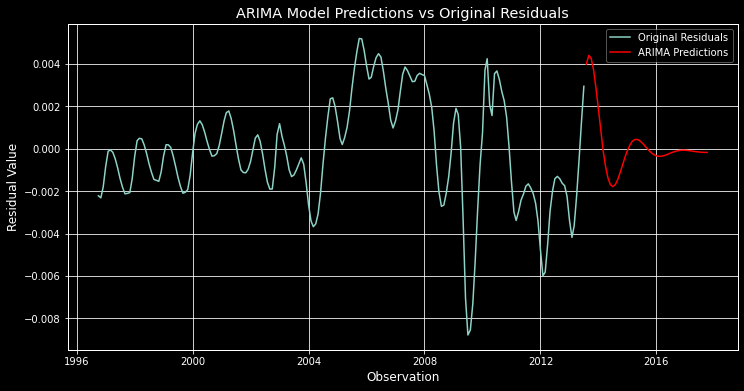

In [47]:
# Visualizing the results
plt.figure(figsize=(12, 6))
plt.plot(train['Residuals'], label='Original Residuals')
plt.plot(test_pred, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model Predictions vs Original Residuals')
plt.xlabel('Observation')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

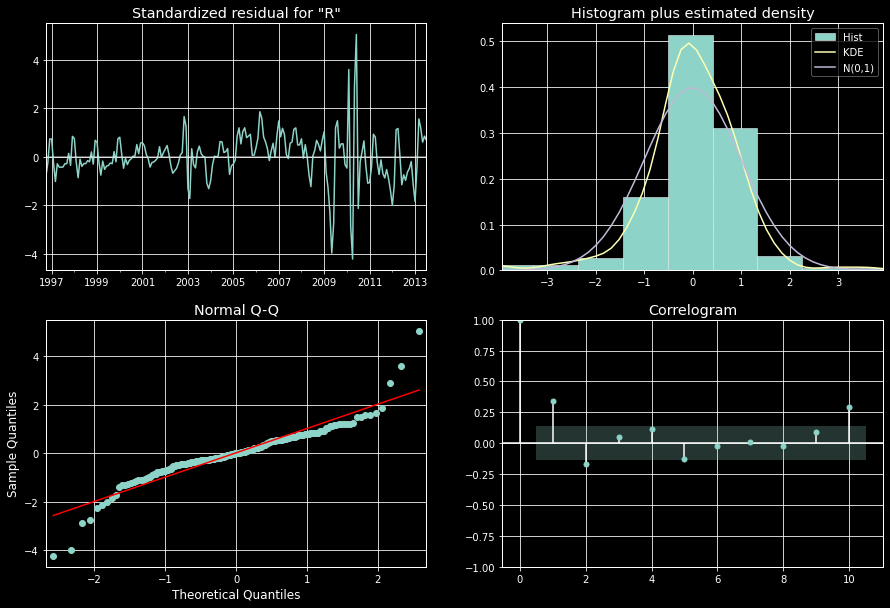

In [48]:
# Plot diagnostics for the statistical model
res_arma.plot_diagnostics(figsize=(15, 10))
plt.show()

## Model 2: ARIMA(2,1) Model

In [49]:
# Split the data into train and test sets
n_obs = len(diff_df)
train_size = int(n_obs * 0.8) 
train, test = diff_df.iloc[:train_size], diff_df.iloc[train_size:]

In [50]:
# Instantiate an AR(1) model to the df
mod_arma = ARIMA(train['Residuals'],order=(2,0,1))

In [51]:
# Fit the model to data
res_arma = mod_arma.fit()

In [52]:
# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:              Residuals   No. Observations:                  202
Model:                 ARIMA(2, 0, 1)   Log Likelihood                1269.401
Date:                Thu, 07 Dec 2023   AIC                          -2528.801
Time:                        21:40:30   BIC                          -2512.260
Sample:                    10-01-1996   HQIC                         -2522.109
                         - 07-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.327      0.743      -0.001       0.001
ar.L1          1.5180      0.035     43.039      0.000       1.449       1.587
ar.L2         -0.6316      0.039    -16.340      0.0

In [53]:
# Print out the estimate for the constant and for theta
print(res_arma.params)

const    -1.475600e-04
ar.L1     1.518034e+00
ar.L2    -6.316258e-01
ma.L1     5.278131e-01
sigma2    1.988463e-07
dtype: float64


In [54]:
# Evaluate the model
test_pred = res_arma.predict(start=test.index[0], end=test.index[-1])

# Calculate the MSE for the predictions on the test set
test_mse = mean_squared_error(test['Residuals'], test_pred)
print(f'Test Data MSE: {test_mse}')

Test Data MSE: 6.675563129800629e-07


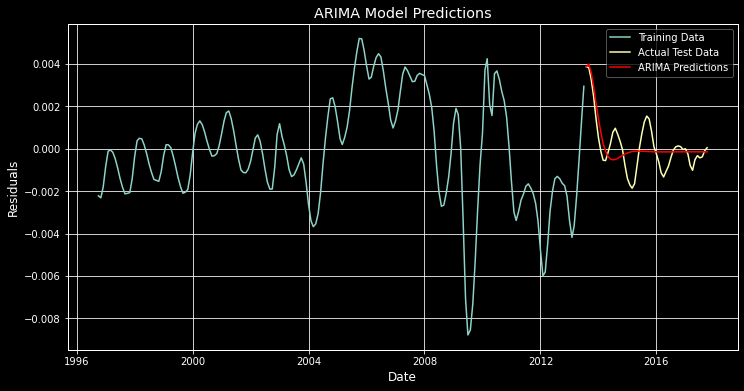

In [55]:
# Plot the training data, actual test data, and predictions
plt.figure(figsize=(12, 6))
plt.plot(train['Residuals'], label='Training Data')
plt.plot(test['Residuals'], label='Actual Test Data')
plt.plot(test_pred, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

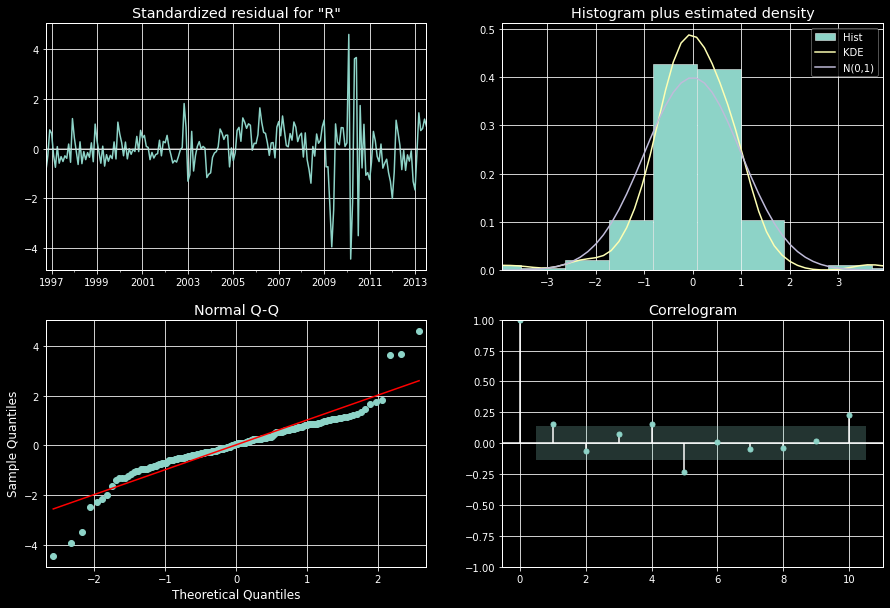

In [56]:
# Plot diagnostics for the statistical model
res_arma.plot_diagnostics(figsize=(15, 10))
plt.show()

## Model 3: SARIMA Model

In [57]:
# Split the data into train and test sets (80% train, 20% test in this example)
n = len(diff_df)
train = diff_df.iloc[:int(n*0.8)]
test = diff_df.iloc[int(n*0.8):]

In [58]:
# Fit SARIMA model
model = SARIMAX(train['Residuals'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

In [59]:
# Fit the model to data
result = model.fit()

In [60]:
# Summary of the SARIMA model
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Residuals   No. Observations:                  202
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1133.087
Date:                            Thu, 07 Dec 2023   AIC                          -2256.173
Time:                                    21:40:32   BIC                          -2239.964
Sample:                                10-01-1996   HQIC                         -2249.607
                                     - 07-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4097      0.033     12.252      0.000       0.344       0.475
ma.L1          0.6769      0.037   

In [61]:
# Print out the estimate for the constant and for theta
print(res_arma.params)

const    -1.475600e-04
ar.L1     1.518034e+00
ar.L2    -6.316258e-01
ma.L1     5.278131e-01
sigma2    1.988463e-07
dtype: float64


In [62]:
# Evaluate the model
test_pred = result.predict(start=test.index[0], end=test.index[-1])

# Calculate the MSE for the predictions on the test set
test_mse = mean_squared_error(test['Residuals'], test_pred)
print(f'Test Data MSE: {test_mse}')

Test Data MSE: 0.00013748286477835325


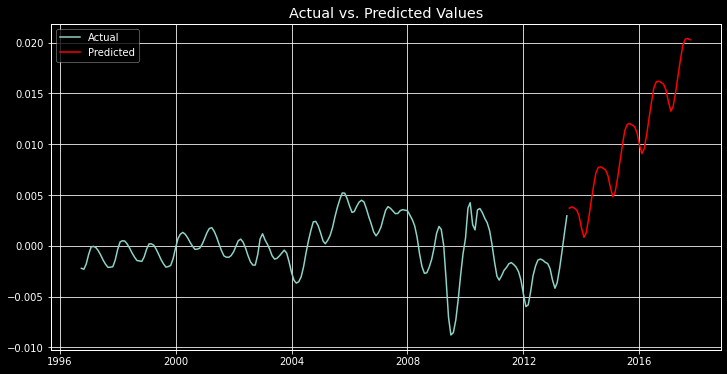

In [63]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train['Residuals'], label='Actual')
plt.plot(test_pred, color='red', label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()

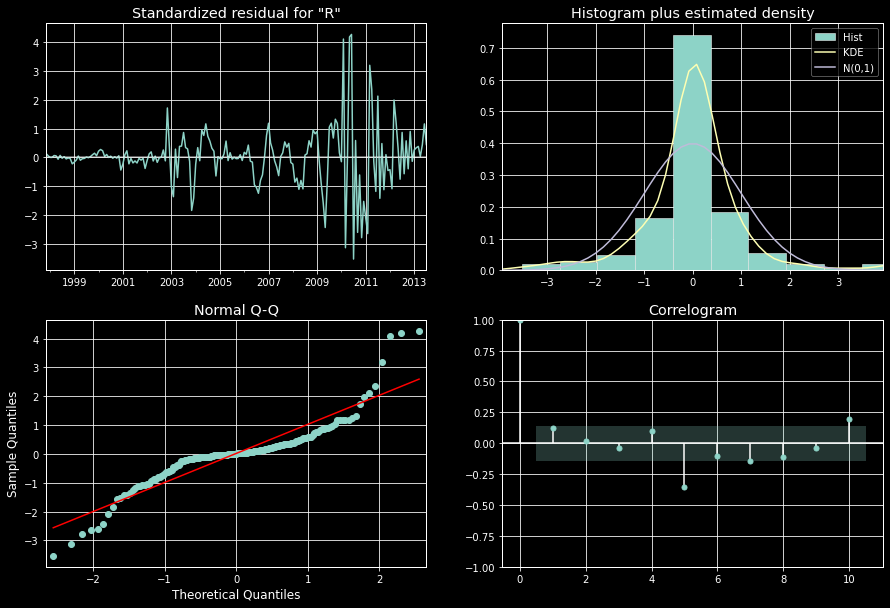

In [64]:
# Plot diagnostics for the statistical model
result.plot_diagnostics(figsize=(15, 10))
plt.show()

## Model 4: PMDARIMA( auto_arima)

In [65]:
# Split your data
train, test = train_test_split(diff_df, train_size=0.8)

In [66]:
# Fit ARIMA model using auto_arima
model = pm.auto_arima(train, start_p=0, start_q=0, start_P=0, start_Q=0, max_p=5, max_q=5, max_P=5, max_Q=5,
                             seasonal=True, m=12, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True,
                             stepwise=True, with_intercept=False)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-2055.919, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-2201.834, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-2072.155, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-2179.863, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-2206.750, Time=0.66 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=-2213.845, Time=1.64 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=inf, Time=2.37 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=-2210.097, Time=1.49 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-2203.199, Time=0.52 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=-2200.739, Time=3.35 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=-2074.064, Time=0.58 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=-2253.088, Time=2.57 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-2243.649, Time=0.40 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=inf, Time=4.84 sec
 ARIMA(2,1,0)(3,1

In [67]:
# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

In [68]:
# Summary of the ARIMA model
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  202
Model:               SARIMAX(2, 0, 1)   Log Likelihood                1269.379
Date:                Thu, 07 Dec 2023   AIC                          -2530.758
Time:                        21:42:03   BIC                          -2517.525
Sample:                    10-01-1996   HQIC                         -2525.404
                         - 07-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5176      0.035     42.979      0.000       1.448       1.587
ar.L2         -0.6311      0.038    -16.447      0.000      -0.706      -0.556
ma.L1          0.5280      0.044     12.121      0.0

In [69]:
# Make predictions on the test set
forecasts = model.predict(n_periods=len(test))

# Calculate the MSE for the predictions on the test set
test_mse = mean_squared_error(test, forecasts)
print(f'Test Data MSE: {test_mse}')

Test Data MSE: 7.125702038342675e-07


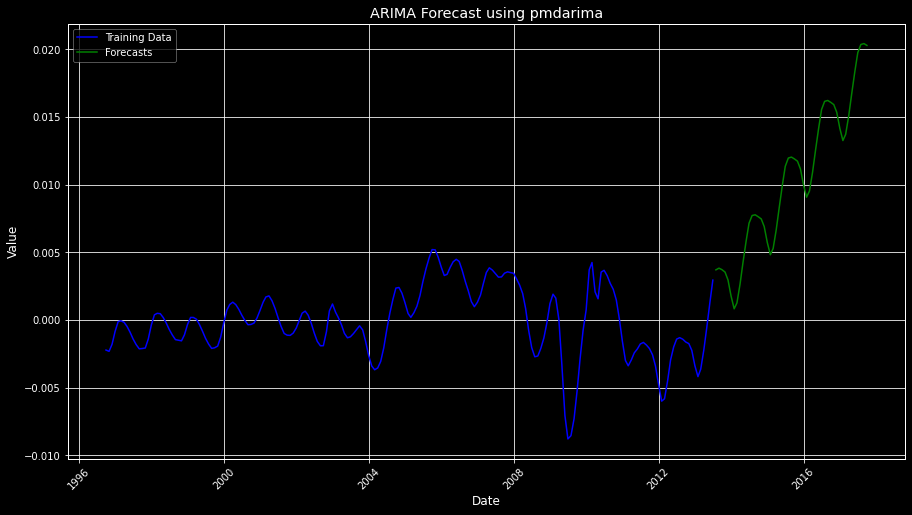

In [70]:
# Convert index to a column 
diff_df.reset_index(inplace=True)

# Split data by row indices to maintain the order for time series
train_size = int(len(diff_df) * 0.8)
train, test = diff_df.iloc[:train_size], diff_df.iloc[train_size:]

# Extract date for x-axis from the DataFrame
dates = diff_df['Date']

# Visualize the forecasts (blue=train, green=forecasts)
plt.figure(figsize=(15, 8))
plt.plot(dates[:train_size], train['Residuals'], c='blue', label='Training Data')
plt.plot(dates[train_size:], test_pred, c='green', label='Forecasts')

# Optional: Rotate the dates on the x-axis for better readability
plt.xticks(rotation=45)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecast using pmdarima')
plt.legend()
plt.show()


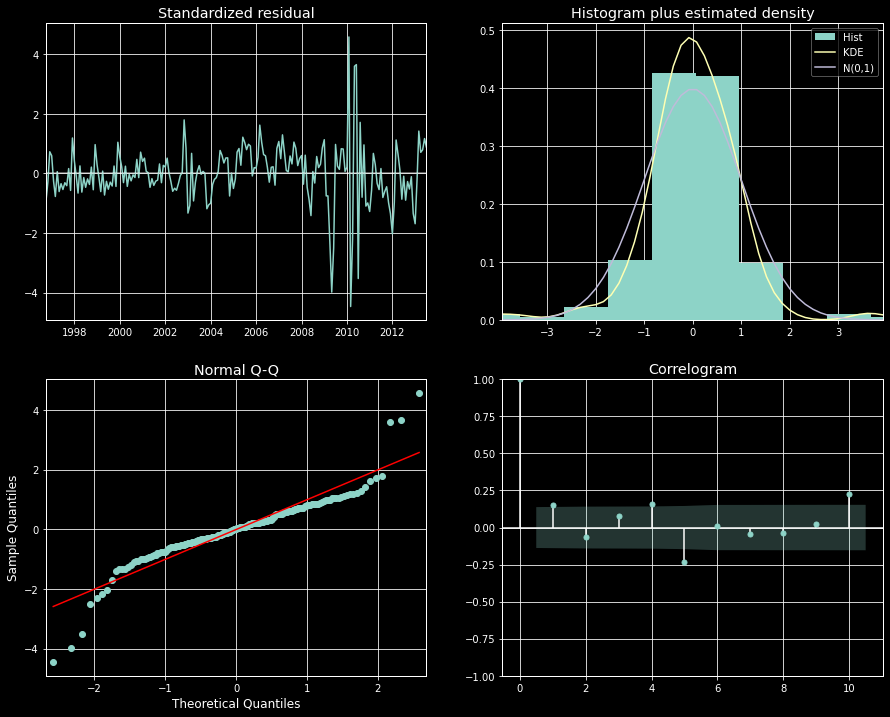

In [71]:
# Plot diagnostics for the statistical model
model.plot_diagnostics(figsize=(15, 12))
plt.show()

# Evaluation

The Mean Squared Error (MSE) is a common evaluation metric used in regression and time series analysis to measure the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. A lower MSE indicates a better fit of the model to the data. 

**Model 1: ARIMA(2,0) Model**

Test Data MSE: 1.2113099061625732e-06

This is an ARIMA model with parameters (2,0,0), indicating an autoregressive model of order 2 without differencing or moving average components.

The MSE is relatively low, but not the lowest among the models presented.

**Model 2: ARIMA(2,1) Model**

Test Data MSE: 6.675563129800525e-07

This model is an ARIMA model with parameters (2,1,0), suggesting an autoregressive model of order 2 with first-order differencing.

The MSE here is lower than that of Model 1, indicating that the inclusion of differencing (integrated component) has improved the model's performance.

**Model 3: SARIMA Model**

Test Data MSE: 0.00013748286477854483

This model is a SARIMA model, which extends ARIMA by adding seasonal components.

Interestingly, the MSE for this model is significantly higher than the others, suggesting that the addition of seasonal components in this case may not be capturing the data's patterns effectively or the model might be overfitting.

**Model 4: PMDARIMA (auto_arima)**

Test Data MSE: 7.125702038342685e-07

This model is fitted using auto_arima from the pmdarima package, which automatically determines the best ARIMA model.
The MSE is very close to that of Model 2, indicating a similarly good fit to the data.

# Conclusion:

Based on the MSE values:

The best performing model is Model 2: ARIMA(2,1), with the lowest MSE. This suggests that the model is best at capturing the underlying data patterns among the models tested.

Model 4 (PMDARIMA) also performs very well, almost as good as Model 2, indicating that the automatic model selection process of auto_arima is effective.

Model 1 (ARIMA(2,0)) performs reasonably well but not as good as Model 2 or 4.

Model 3 (SARIMA), despite being more complex and accounting for seasonality, does not perform as well as the others in this particular case, which might be due to the data not having a strong seasonal pattern or due to overfitting.

In summary, for this specific dataset and based on the MSE evaluation metric, the ARIMA(2,1) model is the most suitable choice.

However, it's important to consider other factors and metrics as well, such as the nature of the data, the presence of seasonality, and model interpretability, before finalizing the model choice.

# Recommendations

The top 5 zip codes ranked by highest return on investment (ROI) with the least amount of unpredictability and variation are:

* 11211: Kings County, New York
* 11222: Kings County, New York
* 11216: Kings County, New York
* 7302: Hudson County, Jersey City
* 11215: Kings County, New York

The regions selected share certain characteristics that yield attractive risk adjusted return. Each zip code is from a Tier 1 or 2 city. These cities share the characteristics of:


1. Healthy employment and strong economics anchored by the higher than usual opportunity in these high tier cities.

2. Proximity to amenities such as parks, entertainment, or transit.

3. Population growth fueling housing demand.

We would recommend that future investment consideration adheres to these characteristics. Together, they create strong demand that results in efficient ROI. Further analysis that uses employment, income growth, and population growth may reveal other lucrative zip codes.

## Limitations

1. Property values are influenced by more than just time; they are also affected by the balance of supply and demand, which this study does not entirely encompass. While this is useful for understanding how real estate markets change over time, it does nothing to explain all the other factors that are driving changes in housing prices. Some next steps in this project include added exogenous factors to our model:

* Interest rates
* Crime data
* Median income over time 
* Population growth
* Morgage rates

Nonetheless, incorporating these factors goes beyond the intended purpose of this particular project.

2. The Zillow dataset used for this analysis had its most recent data points in April 2018. Finding more recent data will allow us to more accurately forecast future home value into 2025 and beyond.